In [81]:
import numpy as np
import pandas as pd
import re

import warnings
warnings.filterwarnings('ignore')

In [82]:
# These help the maps display nicely in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = [5, 5]

In [114]:
# load in scraped data as dataframes

chinatown = pd.read_csv("chinatownloc.csv")
fidi = pd.read_csv("fidiloc.csv")
bvhp = pd.read_csv("BVHPloc.csv")
mission = pd.read_csv("missionloc.csv")
marina = pd.read_csv("marinaloc.csv")

neighborhoods = [chinatown, fidi, bvhp, mission, marina]

## by price range

In [138]:
# chinatown

chinatown.groupby("price_range").count().iloc[:,1] \
/ sum(chinatown.groupby("price_range").count().iloc[:,1])

price_range
$       0.529915
$$      0.427350
$$$     0.025641
$$$$    0.017094
Name: rank, dtype: float64

In [139]:
# marina

marina.groupby("price_range").count().iloc[:,1] \
/ sum(marina.groupby("price_range").count().iloc[:,1])

price_range
$       0.244275
$$      0.641221
$$$     0.099237
$$$$    0.015267
Name: rank, dtype: float64

In [137]:
# fidi 

fidi.groupby("price_range").count().iloc[:,1] \
/ sum(fidi.groupby("price_range").count().iloc[:,1])

price_range
$       0.403846
$$      0.482906
$$$     0.091880
$$$$    0.021368
Name: rank, dtype: float64

In [136]:
# BVHP

bvhp.groupby("price_range").count().iloc[:,1] \
/ sum(bvhp.groupby("price_range").count().iloc[:,1])

price_range
$     0.535714
$$    0.464286
Name: rank, dtype: float64

In [140]:
# mission

mission.groupby("price_range").count().iloc[:,1] \
/ sum(mission.groupby("price_range").count().iloc[:,1])

price_range
$       0.415584
$$      0.519481
$$$     0.044156
$$$$    0.020779
Name: rank, dtype: float64

## cuisine analysis

In [115]:
# turn yelp categories into list format
# create primary category column that lists just one cuisine

for neighborhood in neighborhoods:
    categories = []
    for i in np.arange(len(neighborhood["categories"])):
        category = neighborhood["categories"][i].split(',')
        categories.append(category)
    neighborhood["categories"] = categories
    neighborhood["primary_category"] = [category[0] for category in categories]

In [100]:
# fast food (chinatown, fidi, bvhp, mission, marina)

ffs = []
for neighborhood in neighborhoods:
    ff = sum([int('Fast Food' in neighborhood["categories"][x]) for x in np.arange(len(neighborhood["categories"]))])/len(neighborhood["categories"])
    ffs.append(ff)
ffs

[0.007518796992481203,
 0.04933586337760911,
 0.0945945945945946,
 0.0273972602739726,
 0.0]

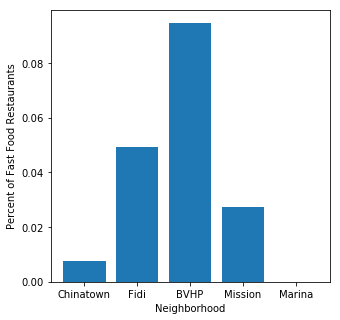

In [107]:
x = np.arange(5)

plt.bar(x, ffs)
plt.xticks(x, ("Chinatown", "Fidi", "BVHP", "Mission", "Marina"))
plt.xlabel("Neighborhood")
plt.ylabel("Percent of Fast Food Restaurants")
plt.show()

In [ ]:
for neighborhood in neighborhoods:
    dict = {}
    dict["Mexican"] = sum([int('Mexican' in neighborhood["categories"][x]) for x in np.arange(len(neighborhood["categories"]))])/len(neighborhood["categories"])
    canto = sum([int('Cantonese' in neighborhood["categories"][x]) for x in np.arange(len(neighborhood["categories"]))])/len(neighborhood["categories"])   
    dimsum = sum([int('Cantonese' in neighborhood["categories"][x]) for x in np.arange(len(neighborhood["categories"]))])/len(neighborhood["categories"])   
    dict["Chinese"] = sum([int('C' in neighborhood["categories"][x]) for x in np.arange(len(neighborhood["categories"]))])/len(neighborhood["categories"])
    dict["Mexican"] = sum([int('Mexican' in neighborhood["categories"][x]) for x in np.arange(len(neighborhood["categories"]))])/len(neighborhood["categories"])
    
    
    
    
    

In [160]:
bvhp.groupby("primary_category").count()
x = 10
mission_top10 = mission.groupby("primary_category").count().iloc[:,1].to_frame().sort_values(by="rank", ascending = False).head(10)

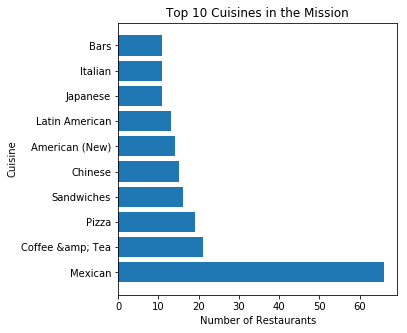

In [167]:
x = 10
plt.barh(np.arange(10), mission_top10.values)
plt.yticks(np.arange(10), mission_top10.index)
plt.ylabel("Cuisine")
plt.xlabel("Number of Restaurants")
plt.title("Top 10 Cuisines in the Mission")

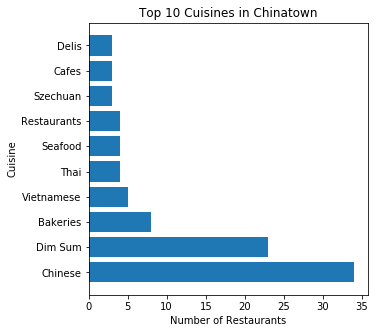

In [170]:
mission_top10 = chinatown.groupby("primary_category").count().iloc[:,1].to_frame().sort_values(by="rank", ascending = False).head(10)
plt.barh(np.arange(10), mission_top10.values)
plt.yticks(np.arange(10), mission_top10.index)
plt.ylabel("Cuisine")
plt.xlabel("Number of Restaurants")
plt.title("Top 10 Cuisines in Chinatown")






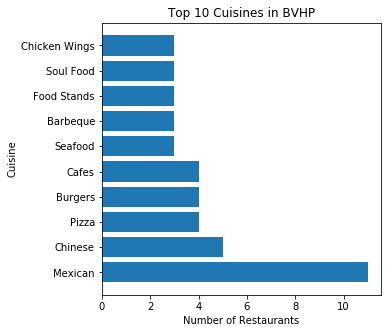

In [177]:
mission_top10 = bvhp.groupby("primary_category").count().iloc[:,1].to_frame().sort_values(by="rank", ascending = False).head(10)
plt.barh(np.arange(10), mission_top10.values)
plt.yticks(np.arange(10), mission_top10.index)
plt.ylabel("Cuisine")
plt.xlabel("Number of Restaurants")
plt.title("Top 10 Cuisines in BVHP")


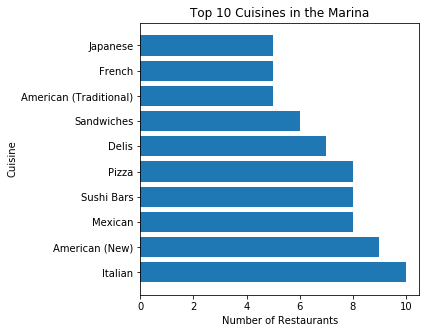

In [178]:
mission_top10 = marina.groupby("primary_category").count().iloc[:,1].to_frame().sort_values(by="rank", ascending = False).head(10)
plt.barh(np.arange(10), mission_top10.values)
plt.yticks(np.arange(10), mission_top10.index)
plt.ylabel("Cuisine")
plt.xlabel("Number of Restaurants")
plt.title("Top 10 Cuisines in the Marina")

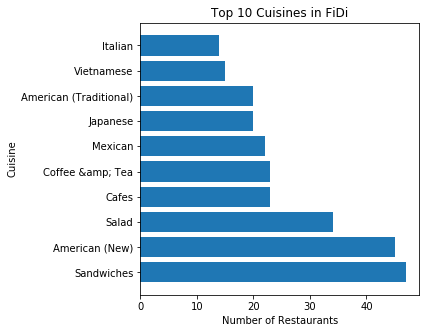

In [179]:
mission_top10 = fidi.groupby("primary_category").count().iloc[:,1].to_frame().sort_values(by="rank", ascending = False).head(10)
plt.barh(np.arange(10), mission_top10.values)
plt.yticks(np.arange(10), mission_top10.index)
plt.ylabel("Cuisine")
plt.xlabel("Number of Restaurants")
plt.title("Top 10 Cuisines in FiDi")